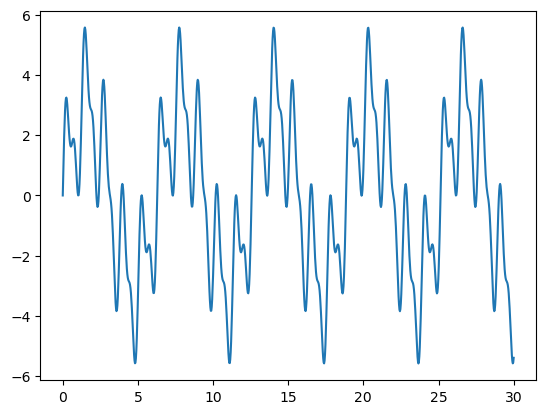

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
x= np.linspace (0, 30, 1000)
y = 3*np.sin(x) +2*np.sin(5*x) + np.sin(10*x)
new_y = signal.detrend (y)
plt.plot(x,y)
#plt.plot(x, new_y)

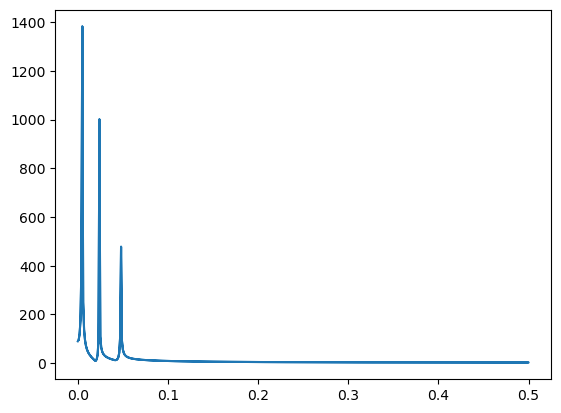

In [11]:
from scipy import fftpack      # filtrer le signal
fourier = fftpack.fft(y)
power = np.abs(fourier)
frequences = fftpack.fftfreq (y.size)
plt.plot (np.abs(frequences), power)

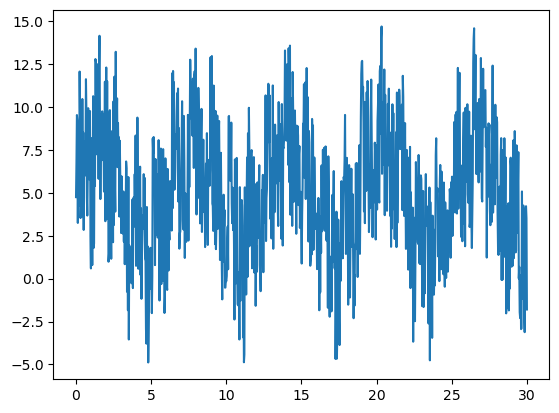

In [63]:
# On veut filtrer un signal ayant du bruit comment s'y prendre 
x= np.linspace (0, 30, 1000)
y = 3*np.sin(x) +2*np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0])*10  # signal avec les bruits a filtrer
plt.plot (x,y)

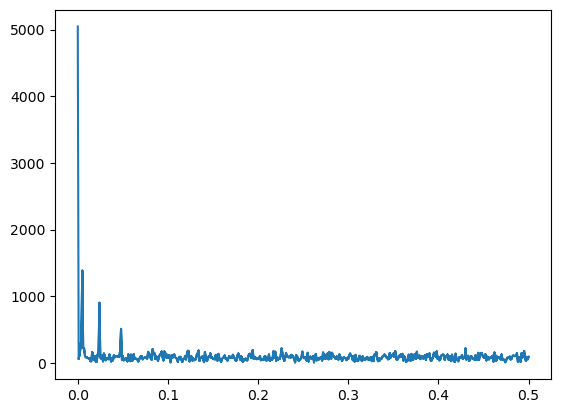

In [65]:
fourier = fftpack.fft(y)
power = np.abs (fourier)
frequences = fftpack.fftfreq (y.size)
plt.plot (np.abs(frequences), power)

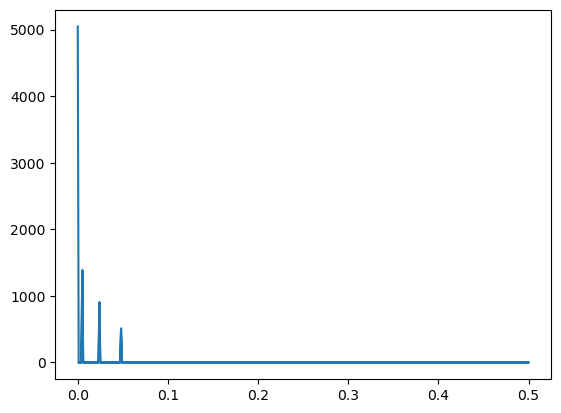

In [67]:
fourier[power<400] = 0
plt.plot (np.abs(frequences), np.abs(fourier))

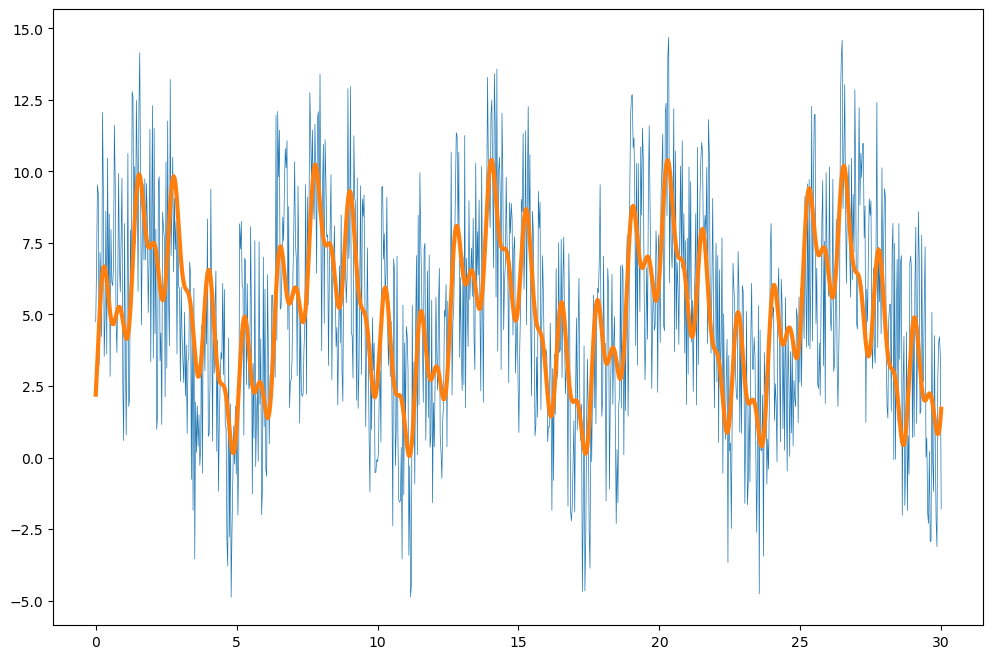

In [69]:
filtered_signal = fftpack.ifft(fourier)
plt.figure (figsize=(12,8))
plt.plot (x,y, lw=0.5)
plt.plot (x, filtered_signal, lw= 3)    # imgaes filtres 
plt.show ()

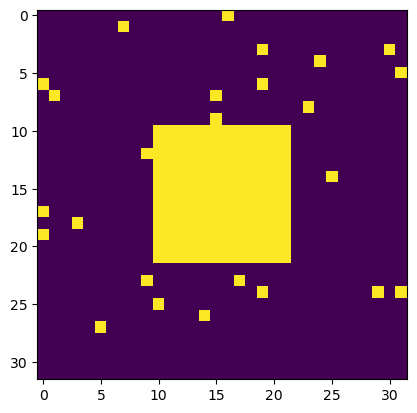

In [73]:
# Erosion et Dialtion um Artefakte zu entfernen
from scipy import ndimage 
np.random.seed(0)
X = np.zeros ((32, 32))
X[10:-10, 10:-10] = 1
X[np.random.randint(0, 32, 30), np.random.randint(0, 32, 30)] = 1
plt.imshow(X)

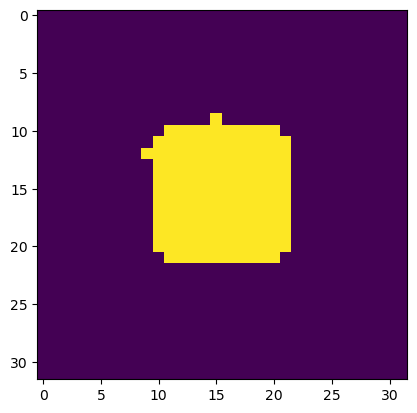

In [75]:
open_x = ndimage.binary_opening(X)
plt.imshow(open_x)

array([[0.9372549 , 0.9372549 , 0.9372549 , ..., 0.9372549 , 0.9372549 ,
        0.9372549 ],
       [0.8901961 , 0.8901961 , 0.8901961 , ..., 0.8901961 , 0.8901961 ,
        0.8901961 ],
       [0.99215686, 0.99215686, 0.9607843 , ..., 0.76862746, 0.7882353 ,
        0.89411765],
       ...,
       [0.9882353 , 0.99607843, 0.99215686, ..., 0.9882353 , 0.9882353 ,
        0.99215686],
       [0.99215686, 0.99607843, 0.99607843, ..., 1.        , 1.        ,
        0.99607843],
       [0.99607843, 0.99607843, 1.        , ..., 1.        , 1.        ,
        1.        ]], dtype=float32)

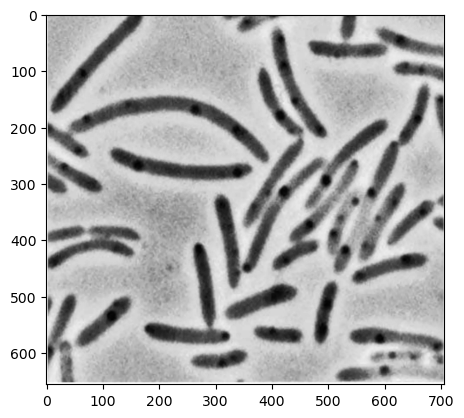

In [139]:
image = plt.imread("Bacteria.png")
image = image[:,:,0]
plt.imshow(image, cmap="gray")
image

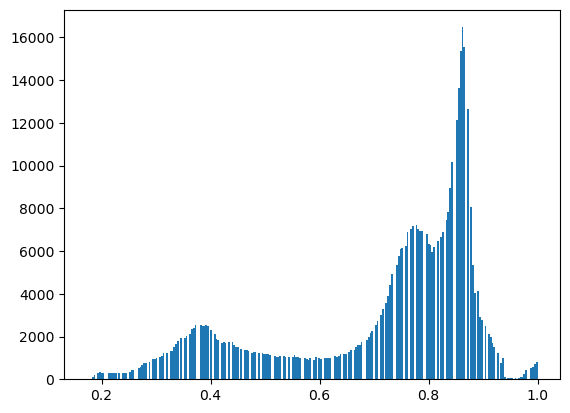

In [141]:
image_2 = np.copy(image)
plt.hist (image_2.ravel(), bins = 255)
plt.show()

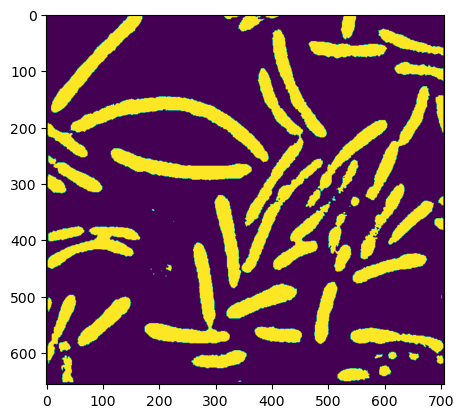

In [143]:
image = image < 0.6
plt.imshow(image)

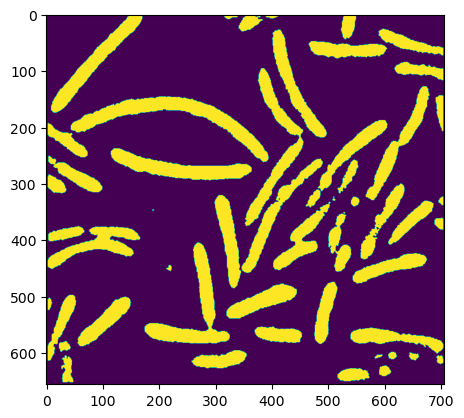

In [145]:
open_x = ndimage.binary_opening(image)
plt.imshow(open_x)

In [132]:
label_image, n_labels = ndimage.label(open_x)     # on utilise label de ndimage pour segmenter l'image et mettre une etiquette sur chaque batterie
print (n_labels)


53


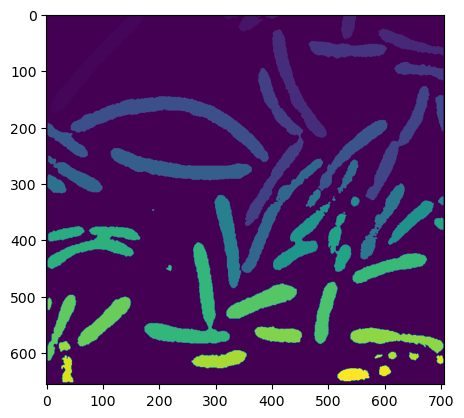

In [147]:
plt.imshow(label_image)

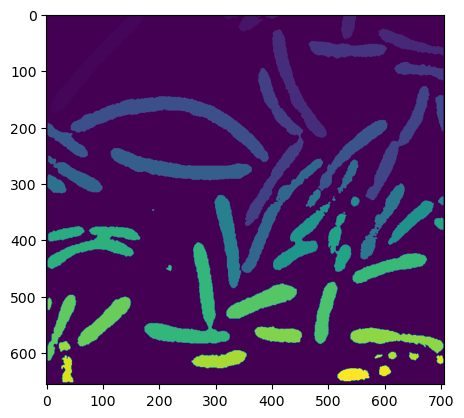

In [93]:
sizes = ndimage.sum (open_x, label_image, range(n_labels))
sizes

array([0.000e+00, 5.352e+03, 1.210e+02, 7.660e+02, 1.010e+02, 8.610e+02,
       2.094e+03, 4.345e+03, 2.941e+03, 1.552e+03, 5.978e+03, 4.396e+03,
       6.220e+02, 9.172e+03, 3.298e+03, 1.589e+03, 6.125e+03, 2.051e+03,
       4.385e+03, 7.880e+02, 7.440e+02, 2.610e+03, 4.240e+02, 3.692e+03,
       2.400e+01, 9.800e+01, 1.970e+02, 1.959e+03, 3.510e+03, 8.000e+00,
       8.000e+00, 1.986e+03, 2.700e+02, 1.070e+03, 4.525e+03, 6.870e+03,
       2.965e+03, 6.500e+01, 2.417e+03, 3.477e+03, 1.959e+03, 2.939e+03,
       1.260e+02, 1.843e+03, 3.248e+03, 2.770e+02, 2.044e+03, 1.550e+02,
       1.710e+02, 6.200e+01, 7.020e+02, 1.510e+02, 3.060e+02])

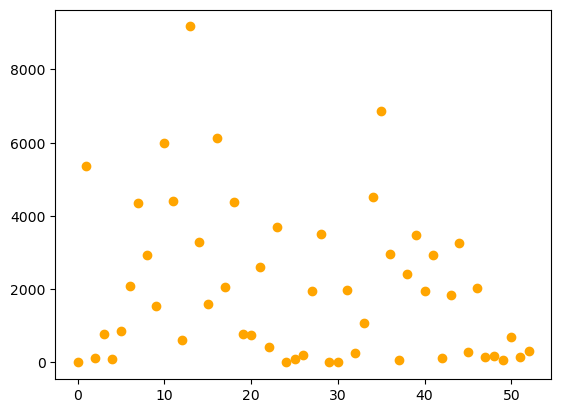

In [95]:
plt.scatter(range(n_labels), sizes, c= "orange")